# ⚙️ Operações Pontuais - Transformando Pixels Individualmente

## 📖 Visão Geral

Este notebook explora as **operações pontuais** - transformações aplicadas pixel por pixel onde cada novo valor depende **apenas** do valor original do pixel, sem considerar seus vizinhos.

### 🎯 **Objetivos de Aprendizado:**
- Compreender o conceito de **transformações pontuais**
- Dominar **brilho e contraste** (transformação linear)
- Implementar **correção gama** (transformação power-law)
- Aplicar **normalização** para padronização
- Executar **operações aritméticas** entre imagens
- Selecionar a técnica adequada para cada situação

### 🧪 **Experimentos Incluídos:**
- Demonstrações visuais de cada transformação
- Análises quantitativas com estatísticas
- Curvas de transformação e histogramas
- Comparações antes/depois
- Guia prático de seleção de parâmetros

---

In [6]:
# 📦 Setup e Importações
import sys
import os

# --- Configuração do Path ---
print(f"Diretório de trabalho atual: {os.getcwd()}")
notebook_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_dir, '../..'))
print(f"Raiz do projeto: {project_root}")

# Adiciona a raiz do projeto ao path do Python
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# --- Importações ---
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.transform import resize

# Importa nossa biblioteca personalizada
try:
    from cv_lib import processamento
    print("✅ Biblioteca 'cv_lib.processamento' importada com sucesso!")
except ImportError as e:
    print(f"❌ Erro ao importar biblioteca: {e}")

print("\n⚙️ Notebook de Operações Pontuais configurado e pronto!")
print("-" * 50)

Diretório de trabalho atual: e:\Personal Projects\Mestrado\ESTUDO CV\Estudo em Python\estudos_cv\notebooks\01 - Fundamentos de Processamento de Imagens
Raiz do projeto: e:\Personal Projects\Mestrado\ESTUDO CV\Estudo em Python\estudos_cv
✅ Biblioteca 'cv_lib.processamento' importada com sucesso!

⚙️ Notebook de Operações Pontuais configurado e pronto!
--------------------------------------------------


## 3.1 O que são Operações Pontuais?

**Operações pontuais** são transformações aplicadas **pixel por pixel**, onde o novo valor de cada pixel depende **apenas** do seu valor original, não dos pixels vizinhos.

### 🎯 Características das Operações Pontuais:
- **Independência espacial**: Cada pixel é processado isoladamente
- **Função de mapeamento**: `novo_valor = f(valor_original)`
- **Preservação da estrutura**: Forma e contornos mantidos
- **Alteração de intensidade**: Modifica brilho, contraste, gama

### 📊 Matemática Fundamental:
Para uma imagem `I(x,y)`, uma operação pontual produz `I'(x,y) = T[I(x,y)]`, onde:
- `T` = função de transformação
- `(x,y)` = coordenadas do pixel  
- Não há dependência de pixels vizinhos

## 3.2 Brilho e Contraste - A Transformação Linear Fundamental

### 🔧 Matemática da Transformação Linear
```
f(x,y) = α × g(x,y) + β
```

**Onde:**
- `f(x,y)` = pixel resultante
- `g(x,y)` = pixel original  
- `α` = **contraste** (inclinação da reta)
- `β` = **brilho** (deslocamento vertical)

### 📈 Interpretação Gráfica:
- **Gráfico de entrada vs. saída** mostra uma reta
- **Inclinação da reta** = contraste
- **Intercepto no eixo Y** = brilho

### ⚙️ Parâmetros e Seus Efeitos:

#### 🔆 **Brilho (β)**:
- `β > 0`: Imagem mais **clara** (desloca para cima)
- `β < 0`: Imagem mais **escura** (desloca para baixo)  
- `β = 0`: Sem mudança de brilho

#### 🎚️ **Contraste (α)**:
- `α > 1`: **Aumenta contraste** (diferenças ampliadas)
- `α = 1`: **Contraste original** (sem mudança)
- `0 < α < 1`: **Diminui contraste** (diferenças reduzidas)
- `α = 0`: **Imagem uniforme** (todos pixels = β)

🎛️ Demonstração de Brilho e Contraste - Transformação Linear


C:\Users\dronc\AppData\Local\Temp\ipykernel_10404\1235299474.py:37: UserWarning: Glyph 127899 (\N{CONTROL KNOBS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\dronc\anaconda3\envs\estudos_cv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127899 (\N{CONTROL KNOBS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


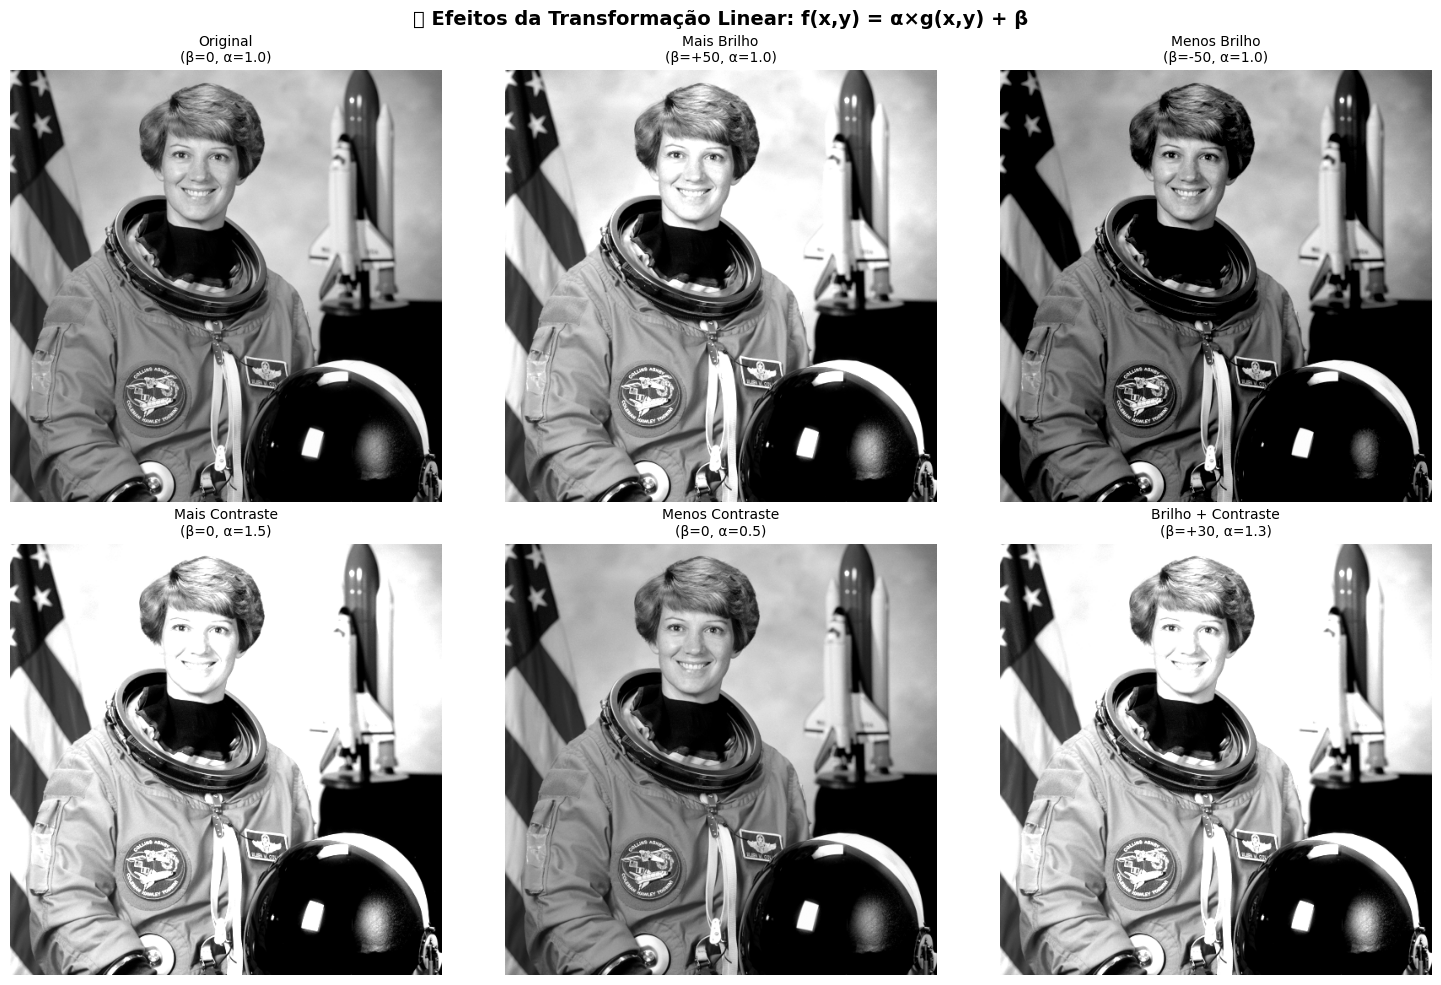


📊 Análise Quantitativa dos Resultados:
Configuração         | Min | Max |  Média | Desvio
----------------------------------------------------------------------
Original             |   0 | 255 |  115.0 |   75.0
Mais Brilho          |  50 | 255 |  163.3 |   72.6
Menos Brilho         |   0 | 205 |   74.8 |   61.7
Mais Contraste       |   0 | 255 |  158.9 |   97.1
Menos Contraste      |   0 | 127 |   57.3 |   37.5
Brilho + Contraste   |  30 | 255 |  168.8 |   85.4

💡 Observações:
• Brilho altera a MÉDIA dos pixels (deslocamento vertical)
• Contraste altera o DESVIO PADRÃO (espalhamento dos valores)
• Valores são sempre cortados (clipping) no intervalo [0, 255]
• Transformação linear preserva a forma dos objetos


In [7]:
# 🔬 EXPERIMENTO: Demonstração Visual de Brilho e Contraste

# Carrega uma imagem RGB e converte para escala de cinza
imagem_rgb = data.astronaut()  # Esta é RGB
imagem_original = processamento.rgb_para_cinza(imagem_rgb)

print("🎛️ Demonstração de Brilho e Contraste - Transformação Linear")

# Define diferentes configurações para demonstrar os efeitos
configuracoes = [
    {"brilho": 0, "contraste": 1.0, "titulo": "Original\n(β=0, α=1.0)"},
    {"brilho": 50, "contraste": 1.0, "titulo": "Mais Brilho\n(β=+50, α=1.0)"},
    {"brilho": -50, "contraste": 1.0, "titulo": "Menos Brilho\n(β=-50, α=1.0)"},
    {"brilho": 0, "contraste": 1.5, "titulo": "Mais Contraste\n(β=0, α=1.5)"},
    {"brilho": 0, "contraste": 0.5, "titulo": "Menos Contraste\n(β=0, α=0.5)"},
    {"brilho": 30, "contraste": 1.3, "titulo": "Brilho + Contraste\n(β=+30, α=1.3)"}
]

# Aplica as transformações
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, config in enumerate(configuracoes):
    # Aplica a transformação usando nossa função
    img_transformada = processamento.ajustar_brilho_contraste(
        imagem_original, 
        brilho=config["brilho"], 
        contraste=config["contraste"]
    )
    
    # Exibe o resultado
    axes[i].imshow(img_transformada, cmap='gray')
    axes[i].set_title(config["titulo"], fontsize=10)
    axes[i].axis('off')

plt.suptitle("🎛️ Efeitos da Transformação Linear: f(x,y) = α×g(x,y) + β", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Análise quantitativa
print("\n📊 Análise Quantitativa dos Resultados:")
print("=" * 70)
print(f"{'Configuração':20} | {'Min':>3} | {'Max':>3} | {'Média':>6} | {'Desvio':>6}")
print("-" * 70)

for config in configuracoes:
    img_transformada = processamento.ajustar_brilho_contraste(
        imagem_original, 
        brilho=config["brilho"], 
        contraste=config["contraste"]
    )
    
    titulo_limpo = config["titulo"].split('\n')[0]
    print(f"{titulo_limpo:20} | {img_transformada.min():3d} | {img_transformada.max():3d} | {img_transformada.mean():6.1f} | {img_transformada.std():6.1f}")

print(f"\n💡 Observações:")
print(f"• Brilho altera a MÉDIA dos pixels (deslocamento vertical)")
print(f"• Contraste altera o DESVIO PADRÃO (espalhamento dos valores)")
print(f"• Valores são sempre cortados (clipping) no intervalo [0, 255]")
print(f"• Transformação linear preserva a forma dos objetos")

## 3.3 Correção Gama - A Transformação Power-Law

### 🌊 Matemática da Transformação Gama
```
f(x,y) = c × [g(x,y) / 255]^γ × 255
```

**Onde:**
- `f(x,y)` = pixel resultante
- `g(x,y)` = pixel original normalizado
- `γ` (gamma) = **exponente** que controla a curvatura
- `c` = constante (normalmente 1.0)

### 📈 Comportamento da Função Power-Law:

#### 🔅 **γ < 1** (Gama Baixo):
- **Curva côncava** - expande tons escuros
- **Clareia sombras** sem saturar highlights
- **Aplicação**: Imagens subexpostas, monitores muito escuros

#### ⚫ **γ = 1** (Linear):
- **Linha reta** - sem alteração
- **Comportamento**: Idêntico ao original

#### 🔆 **γ > 1** (Gama Alto):
- **Curva convexa** - comprime tons claros
- **Escurece highlights** preservando detalhes nas sombras
- **Aplicação**: Imagens superexpostas, ajuste de monitores

🌊 Demonstração da Correção Gama - Transformação Power-Law


C:\Users\dronc\AppData\Local\Temp\ipykernel_10404\4215580291.py:36: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\dronc\anaconda3\envs\estudos_cv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


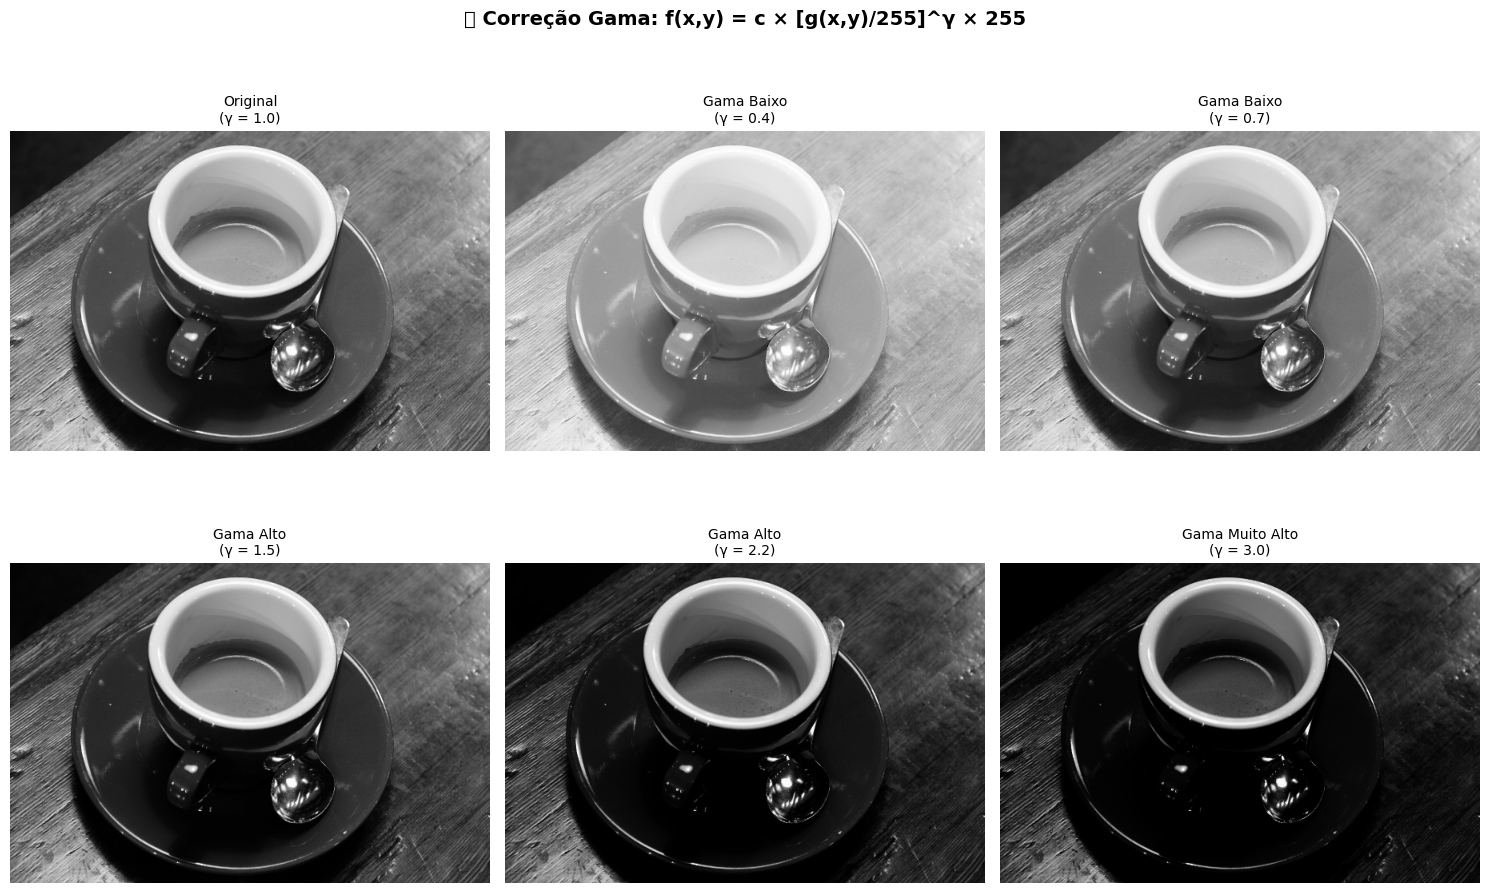


📈 Visualizando as Curvas de Transformação Gama:


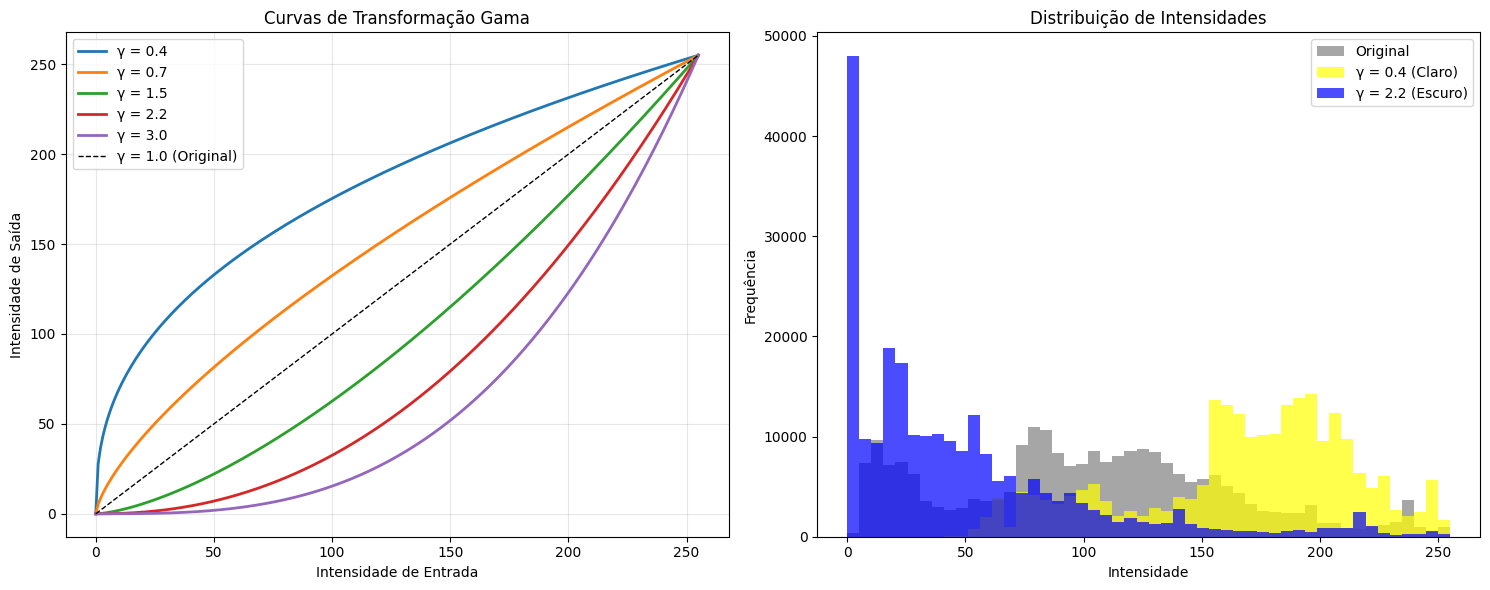

In [8]:
# 🔬 EXPERIMENTO: Demonstração da Correção Gama

# Usando uma imagem RGB com boa faixa dinâmica
imagem_rgb = data.coffee()  # Esta é RGB
imagem_original = processamento.rgb_para_cinza(imagem_rgb)

print("🌊 Demonstração da Correção Gama - Transformação Power-Law")

# Diferentes valores de gamma para demonstrar os efeitos
configuracoes_gama = [
    {"gama": 1.0, "titulo": "Original\n(γ = 1.0)"},
    {"gama": 0.4, "titulo": "Gama Baixo\n(γ = 0.4)"},
    {"gama": 0.7, "titulo": "Gama Baixo\n(γ = 0.7)"},
    {"gama": 1.5, "titulo": "Gama Alto\n(γ = 1.5)"},
    {"gama": 2.2, "titulo": "Gama Alto\n(γ = 2.2)"},
    {"gama": 3.0, "titulo": "Gama Muito Alto\n(γ = 3.0)"}
]

# Demonstração visual das transformações
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

imagens_gama = []

for i, config in enumerate(configuracoes_gama):
    # Aplica correção gama
    img_gama = processamento.correcao_gama(imagem_original, gama=config["gama"])
    imagens_gama.append(img_gama)
    
    # Exibe resultado
    axes[i].imshow(img_gama, cmap='gray')
    axes[i].set_title(config["titulo"], fontsize=10)
    axes[i].axis('off')

plt.suptitle("🌊 Correção Gama: f(x,y) = c × [g(x,y)/255]^γ × 255", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Análise das curvas de transformação
print("\n📈 Visualizando as Curvas de Transformação Gama:")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Valores de entrada para plotar as curvas
x = np.linspace(0, 255, 256)

# Subplot 1: Curvas de transformação
for config in configuracoes_gama[1:]:  # Pula o original
    gama = config["gama"]
    y = 255 * np.power(x / 255.0, gama)
    ax1.plot(x, y, label=f"γ = {gama}", linewidth=2)

# Linha de referência (gama = 1.0)
ax1.plot(x, x, 'k--', label='γ = 1.0 (Original)', linewidth=1)
ax1.set_xlabel('Intensidade de Entrada')
ax1.set_ylabel('Intensidade de Saída')
ax1.set_title('Curvas de Transformação Gama')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Subplot 2: Histogramas comparativos
ax2.hist(imagem_original.flatten(), bins=50, alpha=0.7, label='Original', color='gray')
ax2.hist(imagens_gama[1].flatten(), bins=50, alpha=0.7, label='γ = 0.4 (Claro)', color='yellow')  
ax2.hist(imagens_gama[4].flatten(), bins=50, alpha=0.7, label='γ = 2.2 (Escuro)', color='blue')
ax2.set_xlabel('Intensidade')
ax2.set_ylabel('Frequência')
ax2.set_title('Distribuição de Intensidades')
ax2.legend()

plt.tight_layout()
plt.show()

## 🎓 Resumo: Operações Pontuais Completas

### ✅ **O que Aprendemos:**

#### 🔧 **1. Transformação Linear (Brilho + Contraste)**
- **Fórmula**: `f(x,y) = α × g(x,y) + β`
- **Aplicação**: Correção básica de exposição
- **Vantagem**: Simples e preserva forma
- **Limitação**: Pode causar clipping

#### 🌊 **2. Transformação Power-Law (Correção Gama)**  
- **Fórmula**: `f(x,y) = c × [g(x,y)/255]^γ × 255`
- **Aplicação**: Correção de monitor, realce seletivo
- **Vantagem**: Controle fino de sombras/highlights
- **Limitação**: Mais complexa de ajustar

#### 📊 **3. Normalização Linear**
- **Aplicação**: Padronização, máximo contraste
- **Vantagem**: Usa toda faixa dinâmica
- **Limitação**: Pode amplificar ruído

#### 🧮 **4. Operações Entre Imagens**
- **5 tipos**: Soma, subtração, multiplicação, divisão, média ponderada
- **Aplicação**: Fusão, detecção, mascaramento, correção
- **Vantagem**: Combina informação de múltiplas fontes

---

### 🎯 **Guia de Escolha Rápida:**

| **Problema** | **Solução** | **Parâmetros Típicos** |
|--------------|-------------|------------------------|
| Imagem muito escura | Brilho | β = +30 a +80 |
| Imagem muito clara | Brilho | β = -30 a -80 |  
| Pouco contraste | Contraste | α = 1.2 a 2.0 |
| Muito contraste | Contraste | α = 0.5 a 0.8 |
| Monitor muito escuro | Gama | γ = 0.4 a 0.7 |
| Monitor muito claro | Gama | γ = 1.5 a 2.5 |
| Faixa dinâmica pequena | Normalização | [0, 255] |

---

### 🔬 **Próximos Passos:**
1. **Histogramas** - Análise estatística de imagens
2. **Filtragem espacial** - Operações baseadas em vizinhança
3. **Transformadas de Fourier** - Processamento no domínio da frequência

### 💡 **Dicas Importantes:**
- **Sempre visualizar**: Use histogramas para entender distribuições
- **Ordem importa**: Brilho depois de contraste para melhores resultados  
- **Proteger contra overflow**: Use float64 durante cálculos, uint8 para resultado
- **Testar parâmetros**: Ajustar valores conforme características específicas da imagem

---

*⚙️ **Notebook concluído!** Você agora domina as operações pontuais fundamentais em processamento de imagens.*